In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

Leer el archivo con los datos de entrada

In [2]:
data = pd.read_excel('Clientes.xlsx')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Generamos variables dummy para los datos string 

In [3]:
Attflag_dummy = pd.get_dummies(data["Attrition_Flag"], prefix="Attrition_Flag")
Gender_dummy = pd.get_dummies(data["Gender"], prefix="Gender")
Education_dummy = pd.get_dummies(data["Education_Level"], prefix="Education_Level")
Marital_dummy = pd.get_dummies(data["Marital_Status"], prefix="Marital_Status")
Card_dummy = pd.get_dummies(data["Card_Category"], prefix="Card_Category")
Income_dummy = pd.get_dummies(data["Income_Category"], prefix= "Income_Category") 

Unimos las variables de tipo dummy a la informacion original del archivo clientes

In [4]:
data = pd.concat([data, Attflag_dummy], axis = 1)
data = pd.concat([data, Gender_dummy], axis = 1)
data = pd.concat([data, Education_dummy], axis = 1)
data = pd.concat([data, Marital_dummy], axis = 1)
data = pd.concat([data, Card_dummy], axis = 1)
data = pd.concat([data, Income_dummy], axis = 1)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,0,0,0,0,0,1,0,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,0,0,0,0,0,0,0,1,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,0,0,0,0,0,1,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,0,0,0,0,0,0,0,1,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1,0,0,0,0,1,0,0,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,1,0,0,0,0,1,0,0,0,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,1,0,0,0,0,0,0,0,1,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,1,0,0,0,0,1,0,0,0,0


Quitamos los datos strings reemplazandolas por los objetos dummies

In [5]:
data_dummies_columns = data.drop(data.columns[[1, 3, 5, 6, 7, 8]], axis = 1)
data_dummies_columns

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,0,0,1,0,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,0,0,0,1,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,1,0,0,0,0,0,0,1,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,0,0,0,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,1,0,0,0,0,1,0,0,0,0
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,1,0,0,0,0,1,0,0,0,0
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,0,0,0,0,1,0
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,1,0,0,0,0,1,0,0,0,0


Seleccionar los datos para la clusterización

In [6]:
x = data_dummies_columns.iloc[:,0:83]
x

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,0,0,1,0,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,0,0,0,1,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,1,0,0,0,0,0,0,1,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,0,0,0,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,1,0,0,0,0,1,0,0,0,0
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,1,0,0,0,0,1,0,0,0,0
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,0,0,0,0,1,0
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,1,0,0,0,0,1,0,0,0,0


K-Means

In [7]:
kmeans = KMeans(n_clusters=83)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([40, 55, 25, ..., 79, 46, 25])

Mostrar clusters y separar los datos por columnas

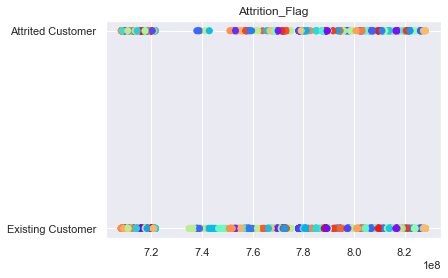

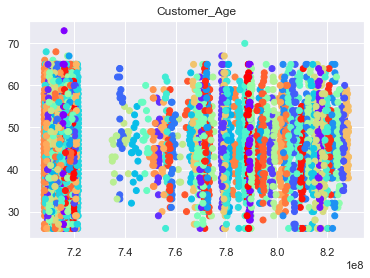

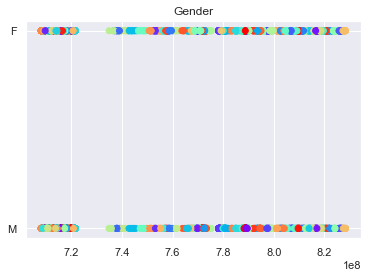

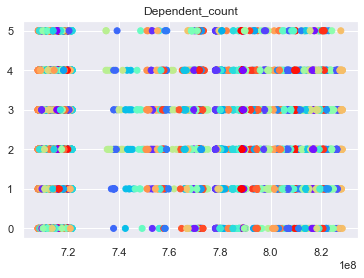

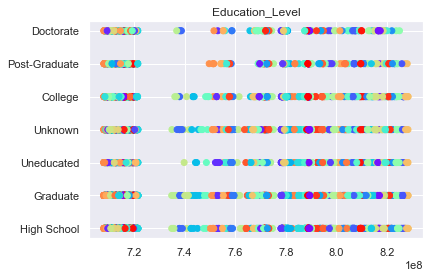

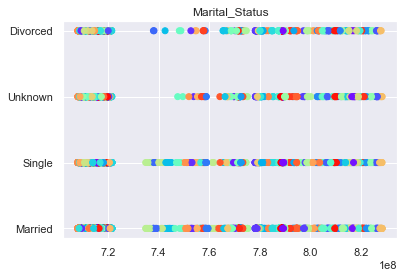

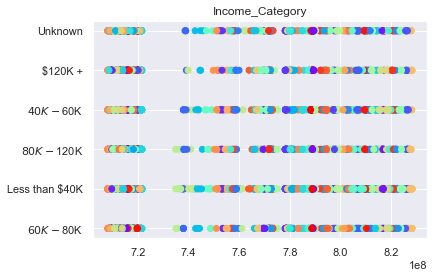

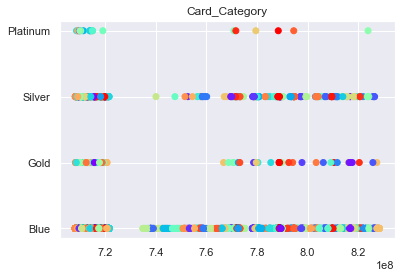

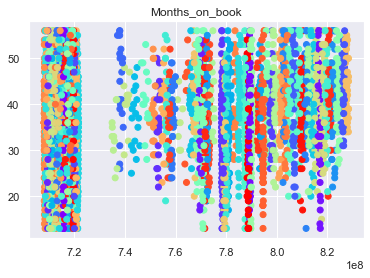

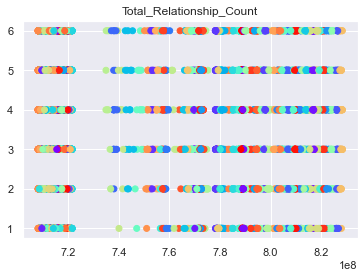

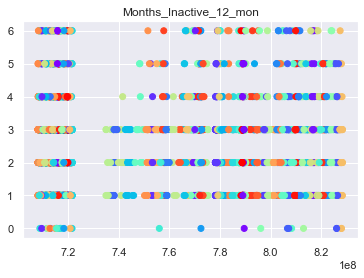

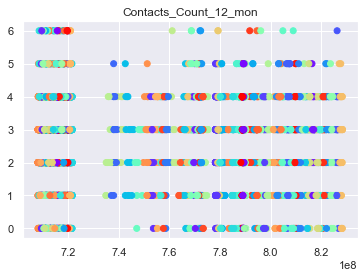

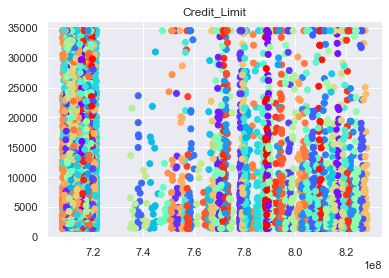

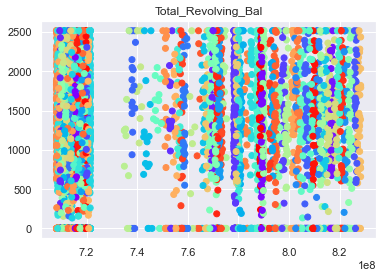

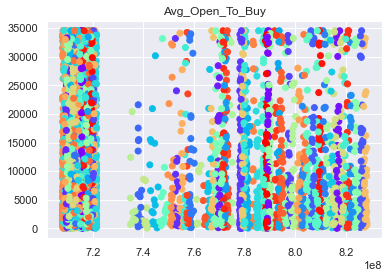

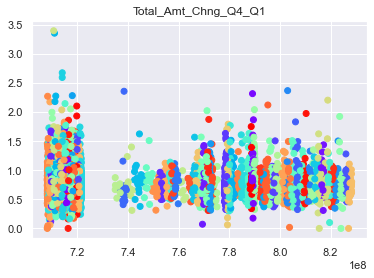

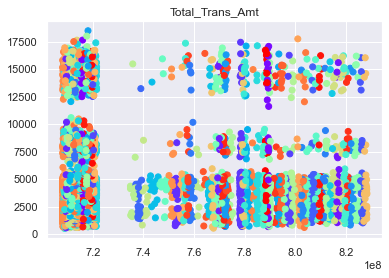

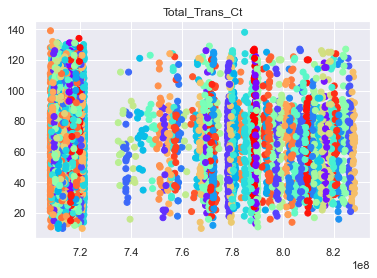

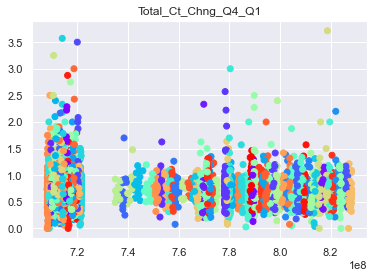

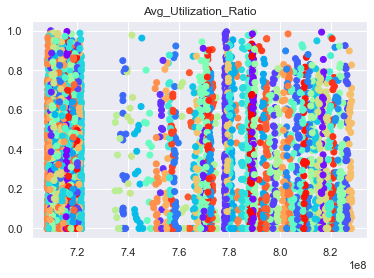

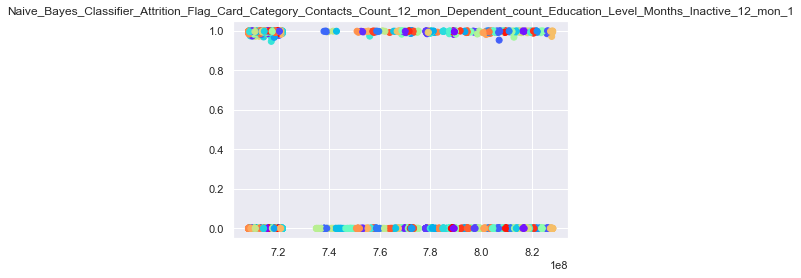

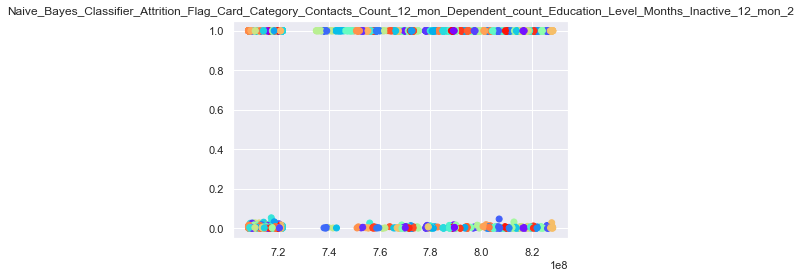

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters

plt.title("Attrition_Flag")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Attrition_Flag'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Customer_Age")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Customer_Age'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Gender")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Gender'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Dependent_count")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Dependent_count'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Education_Level")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Education_Level'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Marital_Status")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Marital_Status'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Income_Category")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Income_Category'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Card_Category")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Card_Category'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Months_on_book")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Months_on_book'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Total_Relationship_Count")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Total_Relationship_Count'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Months_Inactive_12_mon")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Months_Inactive_12_mon'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Contacts_Count_12_mon")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Contacts_Count_12_mon'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Credit_Limit")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Credit_Limit'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Total_Revolving_Bal")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Total_Revolving_Bal'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Avg_Open_To_Buy")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Avg_Open_To_Buy'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Total_Amt_Chng_Q4_Q1")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Total_Amt_Chng_Q4_Q1'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Total_Trans_Amt")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Total_Trans_Amt'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Total_Trans_Ct")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Total_Trans_Ct'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Total_Ct_Chng_Q4_Q1")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Total_Ct_Chng_Q4_Q1'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Avg_Utilization_Ratio")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Avg_Utilization_Ratio'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

plt.title("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2")
plt.scatter(data_with_clusters['CLIENTNUM'], data_with_clusters['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()